- Project Name
- One sentence to sum up 
- Domain

Notebook reference
Dataset

Link of the project in SP

Summary
Context :

- Problematic, business 
challenge (domain)
- AI Solution advantages, WHY SP

- Business value and perspective

Why SP :
- dataset of the show case
- example of obtaining dataset in other situation
- Build tab : accuracy
- Deploy tab : API autogeneration, 
pipeline deployment
- Predict
Application

In [1]:
!pip install FbProphet
!pip install htsprophet
!pip install Dask

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# import smartpredict as sp #smartpredict api
import sklearn as skl
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fbprophet import Prophet
import matplotlib.pylab as plt
import htsprophet
import itertools
from datetime import datetime
from fbprophet.plot import plot_yearly


import warnings
import seaborn as sns
from itertools import cycle

# #prophet the htsp
# from htsprophet.hts import hts, orderHier, makeWeekly
# from htsprophet.htsPlot import plotNode, plotChild, plotNodeComponents

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/m5-forecasting-accuracy/calendar.csv
/kaggle/input/m5-forecasting-accuracy/sample_submission.csv
/kaggle/input/m5-forecasting-accuracy/sell_prices.csv
/kaggle/input/m5-forecasting-accuracy/sales_train_validation.csv
/kaggle/input/m5-forecasting-accuracy/sales_train_evaluation.csv
/kaggle/input/m5-dataset-clean/M5.csv


In [3]:
stv = pd.read_csv(r'/kaggle/input/m5-forecasting-accuracy/sales_train_validation.csv',parse_dates=[0])
stv

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [4]:
d_cols = [c for c in stv.columns if 'd_' in c] #col d_c...
sales = stv.loc[stv['id'] == 'HOBBIES_1_001_CA_1_validation'][d_cols].T



In [5]:
cal = pd.read_csv(r'/kaggle/input/m5-forecasting-accuracy/calendar.csv')
cal



,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [6]:
sales = sales.reset_index()
sales = sales.loc[:,0]
dates = cal.loc[:,'date']


In [7]:
frame = { 'Date': dates, 'Sales': sales }
df = pd.DataFrame(frame)
df.head()

print('-'*20)
print('*** Head of the dataframe ***')
print('-'*20)
print(df.head())
print('-'*20)
print('*** Tail of the dataframe ***')
print('-'*20)
print(df.tail())

--------------------
*** Head of the dataframe ***
--------------------
         Date  Sales
0  2011-01-29    0.0
1  2011-01-30    0.0
2  2011-01-31    0.0
3  2011-02-01    0.0
4  2011-02-02    0.0
--------------------
*** Tail of the dataframe ***
--------------------
            Date  Sales
1964  2016-06-15    NaN
1965  2016-06-16    NaN
1966  2016-06-17    NaN
1967  2016-06-18    NaN
1968  2016-06-19    NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1969 non-null   object 
 1   Sales   1913 non-null   float64
dtypes: float64(1), object(1)
memory usage: 30.9+ KB


In [9]:
# Features days of the week
def date_features(df, label=None):
    df = df.copy()

    df['date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['month'] = df['date'].dt.strftime('%B')
    df['year'] = df['date'].dt.strftime('%Y')
    df['dayofweek'] = df['date'].dt.strftime('%A')
    df['quarter'] = df['date'].dt.quarter
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X
X, y = date_features(df, label='Sales')
df_new = pd.concat([X, y], axis=1)
df_new.head()

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Sales
0,Saturday,1,January,2011,29,29,4,0.0
1,Sunday,1,January,2011,30,30,4,0.0
2,Monday,1,January,2011,31,31,5,0.0
3,Tuesday,1,February,2011,32,1,5,0.0
4,Wednesday,1,February,2011,33,2,5,0.0


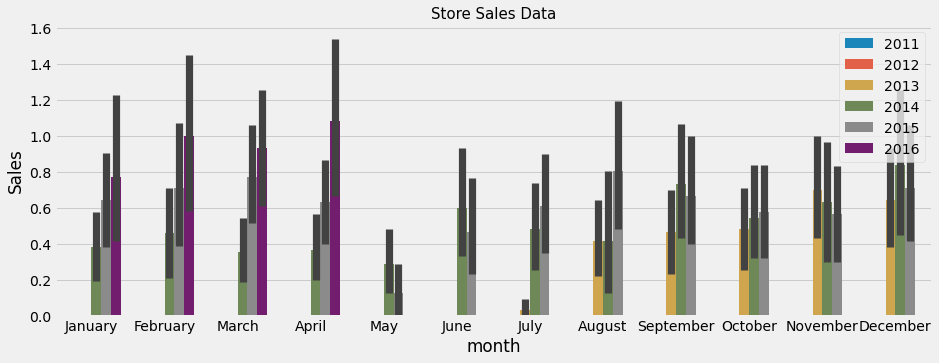

In [10]:
#see trends 
fig, ax = plt.subplots(figsize=(14,5))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="month", y="Sales",hue = 'year',data=df_new)
a.set_title("Store Sales Data",fontsize=15)
plt.legend(loc='upper right')
plt.show()

In [11]:
df=df.rename(columns={'Date':'ds','Sales':'y'})
df.head()

,ds,y
0,2011-01-29,0.0
1,2011-01-30,0.0
2,2011-01-31,0.0
3,2011-02-01,0.0
4,2011-02-02,0.0


In [12]:
# pd.read_csv('')

## Prophet models with seasonality and additional regressors 

In [13]:
# # Detect and remove outliers
# df.loc[(df['ds'] > '2011-01-29') & (df['ds'] < '2011-06-19'), 'y'] = None
# model = Prophet().fit(df)
# fig = model.plot(model.predict(future))

## This step is intended to create a Dataframe of all the listed Holidays in the Dataset 

In [14]:
# dataframes of holidays over training and forecasting periods 
SupB = pd.DataFrame ({'holiday': 'SuperBowls','ds': pd.to_datetime(['2011 - 02 - 06', '2012 - 02 - 05','2013 - 02 - 03','2014 - 02 - 02', '2015 - 02 - 01', '2016 - 02 - 07'], errors='coerce')})
ny = pd.DataFrame({'holiday': "NewYearsDay", 'ds' : pd.to_datetime(['2011 - 01 - 01','2012 - 01 - 01','2013 - 01 - 01','2014 - 01 - 01','2015 - 01 - 01'])})  
mlk = pd.DataFrame({'holiday': 'Birthday of Martin Luther King, Jr.', 'ds' : pd.to_datetime(['2012 - 01 - 16','2013 - 01 - 21','2014 - 01 - 20','2015 - 01 - 19','2016 - 01 - 18'])}) 
# wash = pd.DataFrame({'holiday': "Washington's Birthday", 'ds' : pd.to_datetime(['2016-02-15', '2017-02-20'])})
mem = pd.DataFrame({'holiday': 'Memorial Day', 'ds' : pd.to_datetime(['2011 - 05 - 30', '2012 - 05 - 28','2012 - 05 - 27','2013 - 05 - 26','2015 - 05 - 25','2016 - 05 - 30'])})
ind = pd.DataFrame({'holiday': 'Independence Day', 'ds' : pd.to_datetime(['2011 - 04 - 07','2012 - 07 - 04','2013 - 07 - 04','2014 - 07 - 04','2015 - 07 - 04'])})
lab = pd.DataFrame({'holiday': 'Labor Day', 'ds': pd.to_datetime(['2011 - 09 - 05', '2012 - 09 - 03','2013 - 09 - 02','2014 - 09 - 07'])})
col = pd.DataFrame({'holiday': 'Columbus Day', 'ds': pd.to_datetime(['2011 - 10 - 10', '2012 - 10 - 08','2013 - 10 - 14','2014 - 10 - 13','2015 - 10 - 12'])})
vet = pd.DataFrame({'holiday': "Veteran's Day", 'ds': pd.to_datetime(['2011 - 11 - 11','2012 - 11 - 11','2013 - 11 - 11','2014 - 11 - 11','2015 - 11 - 11',])})
thanks = pd.DataFrame({'holiday': 'Thanksgiving Day', 'ds' : pd.to_datetime(['2011 - 11 - 24','2012 - 11 - 22','2013 - 11 - 28','2014 - 11 - 27','2015 - 11 - 26'])})
christ = pd.DataFrame({'holiday': 'Christmas', 'ds': pd.to_datetime(['2011 - 12 - 25', '2012 - 12 - 25','2013 - 12 - 25','2014 - 12 - 25','2015 - 12 - 25'])})
MotD = pd.DataFrame({'holiday':'MothersDay', 'ds': pd.to_datetime(['2011 - 05 - 08', '2012 - 05 - 13','2013 - 05 - 12', '2014 - 05 - 11','2015 - 05 - 10','2016 - 05 - 8'])})
FatD = pd.DataFrame({'holiday': 'FathersDay', 'ds': pd.to_datetime(['2011 - 06 - 19', '2012 - 06 - 17','2013 - 06 - 16', '2015 - 06 - 21'])})
Val = pd.DataFrame({'holiday':'ValentinesDay', 'ds': pd.to_datetime (['2011 - 02 - 14', '2012 - 02 - 14', '2013 - 02 - 14','2014 - 02 - 14','2015 - 02 - 14','2016 - 02 - 14'])})
Pdt = pd.DataFrame({'holiday': 'PresidentsDay', 'ds': pd.to_datetime(['2011 - 02 - 21', '2012 - 02 - 20', '2013 - 02 - 18','2014 - 02 - 17','2015 - 02 - 16','2016 - 02 - 15'])})
East= pd.DataFrame({'holiday':'Easter', 'ds': pd.to_datetime(['2012 - 04 - 08', '2013 - 03 - 03','2014 - 02 - 04', '2015 - 04 - 05','2016 - 03 - 27'])})
Hal = pd.DataFrame({'holiday': 'Halloween', 'ds': pd.to_datetime(['2011 - 10 - 31', '2012 - 10 - 31','2013 - 10 - 31', '2014 - 10 - 31','2015 - 10 - 31'])})
LentS = pd.DataFrame({'holiday': 'LentStart', 'ds': pd.to_datetime(['2011 - 03 - 09', '2012 - 02 - 22','2013 - 02 - 13','2014 - 03 - 05','2015 - 02 - 18','2016 - 2 - 10'])})
LentW = pd.DataFrame({'holiday':'LentWeek2', 'ds': pd.to_datetime(['2011 - 03 - 16', '2012 - 02 - 29','2013 - 02 - 20', '2014 - 03 - 12','2015 - 02 - 25','2016 - 02 - 17'])})
StP = pd.DataFrame({'holiday':'StPatricksDay', 'ds': pd.to_datetime(['2011 - 03 - 17','2012 - 03 - 17','2013 - 03 - 17','2014 - 03 - 17','2015 - 03 - 17','2016 - 03 - 17'])})
Cinco = pd.DataFrame({'holiday': 'Cinco de Mayo', 'ds': pd.to_datetime(['2011 - 05 - 05', '2012 - 05 - 05','2013 - 05 - 05','2014 - 05 - 05','2015 - 05 - 05'])})
Pur = pd.DataFrame({'holiday': 'PurimEnd', 'ds': pd.to_datetime(['2011 - 03 - 20', '2012 - 08 - 03', '2013 - 02 - 24','2014 - 03 - 16','2015 - 03 - 05','2016 - 03 - 24'])})
EAAd = pd.DataFrame({'holiday': 'EidAlAdah', 'ds': pd.to_datetime(['2011 - 07 - 11','2012 - 10 - 26','2013 - 10 - 15','2014 - 10 - 4','2015 - 09 - 24'])})
Pes = pd.DataFrame({'holiday': 'Pesach', 'ds': pd.to_datetime(['2011 - 04 - 26','2012 - 04 - 14','2013 - 04 - 02','2014 - 04 - 22','2015 - 04 - 11','2016 - 04 - 30'])})
Chan = pd.DataFrame({'holiday': 'Chanukah', 'ds': pd.to_datetime(['2011 - 12 - 28','2012 - 12 - 16','2013 - 12 - 05','2015 - 12 - 14'])})
EidF = pd.DataFrame({'holiday': 'EidaLFitr', 'ds': pd.to_datetime(['2011 - 08 - 31','2012 - 08 - 19','2013 - 08- 08','2014 - 07 - 29','2015 - 07 - 18'])})
OXmas = pd.DataFrame({'holiday': 'OrthodoxChristmas', 'ds': pd.to_datetime(['2012 - 01 - 07','2013 - 01 - 07','2014 - 01 - 07','2015 - 01 - 07','2016 - 01 - 07'])})
OEast = pd.DataFrame({'holiday': 'OrthodoxEaster', 'ds': pd.to_datetime(['2011 - 04 - 24','2013 - 04 - 15','2014 - 05 - 05','2015 - 04 - 12','2016 - 01 - 05'])})
Ram = pd.DataFrame({'holiday': 'Ramadan', 'ds': pd.to_datetime(['2011 - 08 - 01','2012 - 07 - 20','2013 - 09 - 07','2014 - 06 - 29','2015 - 06 - 18','2016 - 06 - 07'])})
NBAfs = pd.DataFrame({'holiday': 'NBAFinalStarts', 'ds': pd.to_datetime(['2011 - 05 - 31','2012 - 06 - 12','2013 - 06 - 06','2014 - 06 - 05','2016 - 06 - 02'])})
NBAfe = pd.DataFrame({'holiday': 'NBAFinalEnds', 'ds': pd.to_datetime(['2011 - 06 - 12','2012 - 06 - 21', '2013 - 06 - 20','2014 - 06 - 15','2015 - 06 - 16','2016 - 06 - 19'])})

holidays = pd.concat([SupB,ny, mlk, mem, ind, lab, col, vet, thanks, christ, MotD, FatD, Val, Pdt,East, Hal, LentS, LentW, StP, Pes, OXmas, Cinco, Pur, EAAd, EidF, OEast, Ram, Chan, NBAfs, NBAfe])


## Creation of the Prophet  model 

In [15]:
m = Prophet()
m.fit(df)

In [16]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2329,2017-06-15
2330,2017-06-16
2331,2017-06-17
2332,2017-06-18
2333,2017-06-19


In [17]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2329,2017-06-15,0.934050,0.120793,1.707639
2330,2017-06-16,0.999184,0.220502,1.779483
2331,2017-06-17,1.158767,0.402666,1.980371
2332,2017-06-18,1.047486,0.273852,1.829717
2333,2017-06-19,1.007773,0.212646,1.766773


In [18]:
# REMOVE NEGATIVE FORECASTED VALUES/outliers
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
future.tail()
# Function to remove any negative forecasted values.
def remove_negs(ts):
    ts['yhat'] = ts['yhat'].clip_lower(0)
    ts['yhat_lower'] = ts['yhat_lower'].clip_lower(0)
    ts['yhat_upper'] = ts['yhat_upper'].clip_lower(0)

          ds      yhat  yhat_lower  yhat_upper
0 2011-01-29  0.061674   -0.677029    0.841508
1 2011-01-30 -0.054232   -0.879235    0.763466
2 2011-01-31 -0.097217   -0.919938    0.660374
3 2011-02-01 -0.028851   -0.741027    0.719468
4 2011-02-02 -0.135478   -0.948980    0.678452


In [19]:
# New Prophet model taking into account the holidays
m= Prophet(holidays= holidays,uncertainty_samples=False,yearly_seasonality=True,weekly_seasonality=True, holidays_prior_scale= 0.05).fit(df)
forecast = m.predict(future)


In [20]:
forecast[(forecast["NewYearsDay"] + forecast ["Memorial Day"]+ forecast ['Independence Day']+ forecast ['SuperBowls']+ forecast ['Labor Day']+ forecast ['Columbus Day']+ forecast ["Veteran's Day"]+ forecast ['Thanksgiving Day']+ forecast ['Christmas']+ forecast ['MothersDay']+ forecast ['FathersDay']+ forecast ['ValentinesDay']+ forecast ['PresidentsDay']+ forecast ['Easter']+ forecast ['Halloween']+ forecast ['LentStart']+ forecast ['LentWeek2']+forecast['StPatricksDay']+forecast['Pesach']+forecast['OrthodoxChristmas']+forecast['Cinco de Mayo']+forecast['PurimEnd']+forecast['NBAFinalEnds']+forecast['NBAFinalStarts']+forecast['EidAlAdah']+forecast['EidaLFitr']+forecast['OrthodoxEaster']+forecast['Ramadan']+forecast['Chanukah']).abs() > 0][
        ['SuperBowls',"NewYearsDay","Memorial Day",'Independence Day','Labor Day','Columbus Day',"Veteran's Day",'Thanksgiving Day','Christmas','MothersDay','FathersDay','ValentinesDay','PresidentsDay','Easter','Halloween','LentStart','LentWeek2','StPatricksDay','Cinco de Mayo','PurimEnd','EidAlAdah','Pesach','Chanukah','EidaLFitr','OrthodoxChristmas','OrthodoxEaster','Ramadan','NBAFinalStarts','NBAFinalEnds']][-10:]


,SuperBowls,NewYearsDay,Memorial Day,Independence Day,Labor Day,Columbus Day,Veteran's Day,Thanksgiving Day,Christmas,MothersDay,...,PurimEnd,EidAlAdah,Pesach,Chanukah,EidaLFitr,OrthodoxChristmas,OrthodoxEaster,Ramadan,NBAFinalStarts,NBAFinalEnds
1845,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1874,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1881,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,-0.091668,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1884,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1918,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,-0.058201,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1926,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.040259,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1948,0.0,0.0,0.022457,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1951,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.102316,0.000000
1956,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.336554,0.000000,0.000000
1968,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.098774


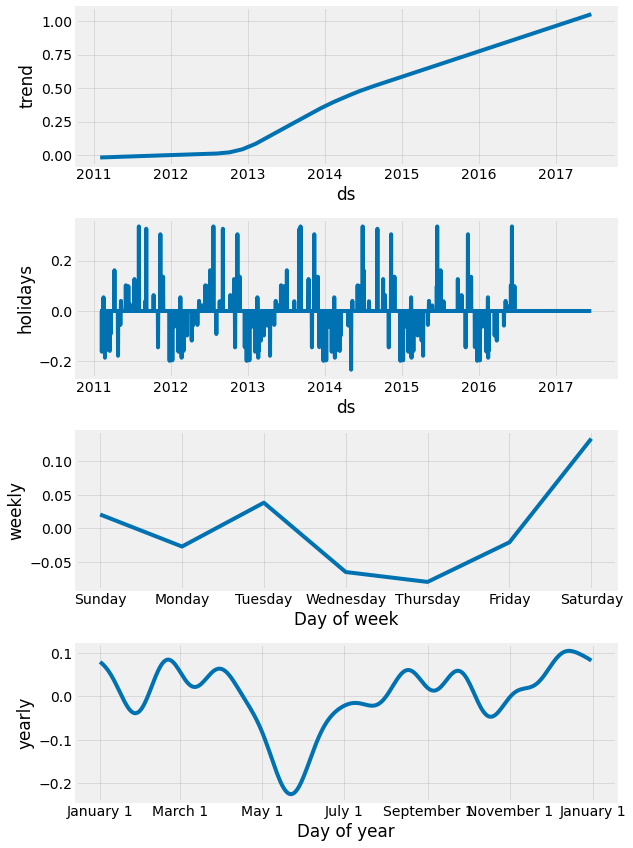

In [21]:
fig1 = m.plot_components(forecast)

In [22]:
#here is how to see all the included holidays
m.train_holiday_names

0                              SuperBowls
1                             NewYearsDay
2     Birthday of Martin Luther King, Jr.
3                            Memorial Day
4                        Independence Day
5                               Labor Day
6                            Columbus Day
7                           Veteran's Day
8                        Thanksgiving Day
9                               Christmas
10                             MothersDay
11                             FathersDay
12                          ValentinesDay
13                          PresidentsDay
14                                 Easter
15                              Halloween
16                              LentStart
17                              LentWeek2
18                          StPatricksDay
19                                 Pesach
20                      OrthodoxChristmas
21                          Cinco de Mayo
22                               PurimEnd
23                              Ei

In [23]:
# The output of cross_validation is a dataframe with the true values y and the out-of-sample forecast values yhat, at each simulated forecast date and for each cutoff date
from fbprophet.diagnostics import cross_validation
cutoffs = pd.to_datetime(['2011-05-21', '2016-01-15'])
df_cv = cross_validation(m, initial = "1,941 days",cutoffs=cutoffs, period = " 1 day", horizon = "28 days")
df_cv.head()  

,ds,yhat,y,cutoff
0,2011-05-22,0.0,0.0,2011-05-21
1,2011-05-23,0.0,0.0,2011-05-21
2,2011-05-24,0.0,0.0,2011-05-21
3,2011-05-25,0.0,0.0,2011-05-21
4,2011-05-26,0.0,0.0,2011-05-21


In [24]:
#METRICS ACCORDING TO THE HORIZON
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mdape
0,3 days,0.283875,0.532799,0.375496,NaN
1,4 days,0.468118,0.684192,0.465098,NaN
2,5 days,0.388312,0.623147,0.391188,NaN
3,6 days,0.568089,0.753717,0.473965,NaN
4,7 days,0.418759,0.647116,0.377517,NaN


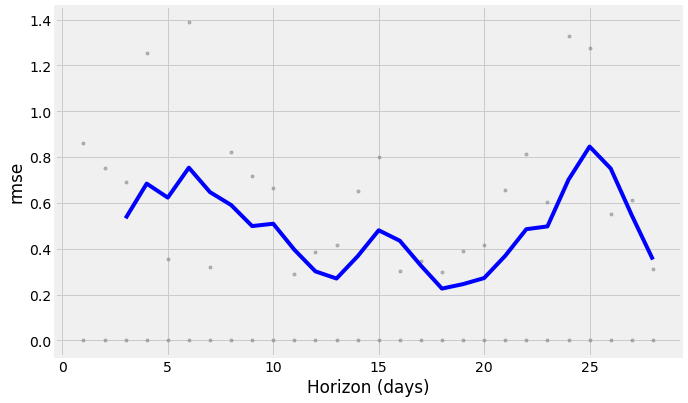

In [25]:
#  METRICS
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv,rolling_window=0.1, metric='rmse')




### HYPERPARAMETERS TUNING 

In [26]:
# Hyperparameters tuning
import pandas as pd
import numpy as np
import itertools
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],# None by default,Auto places
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters, growth can be linear
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='28 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)




    changepoint_prior_scale  seasonality_prior_scale      rmse
0                     0.001                     0.01  0.517412
1                     0.001                     0.10  0.519391
2                     0.001                     1.00  0.525727
3                     0.001                    10.00  0.520737
4                     0.010                     0.01  0.519128
5                     0.010                     0.10  0.521516
6                     0.010                     1.00  0.521264
7                     0.010                    10.00  0.521357
8                     0.100                     0.01  0.517534
9                     0.100                     0.10  0.520225
10                    0.100                     1.00  0.520145
11                    0.100                    10.00  0.520058
12                    0.500                     0.01  0.518795
13                    0.500                     0.10  0.522049
14                    0.500                     1.00  0

In [27]:
best_params = all_params[np.argmin(rmses)]
print(best_params)
{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0}

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01}


{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0}

In [28]:
#  Modify score the outliers
# def outliers_modified_z_score(ys):
#     threshold = 3.5

#     median_y = np.median(ys)
#     median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
#     modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
#                          for y in ys]
#     return np.where(np.abs(modified_z_scores) > threshold)

#Seasonality addition

In [29]:
# # CUSTOM MODULE FOR THE PERFORMANCE 

# def getPerfomanceMetrics(m):
#   return performance_metrics(getCrossValidationData(m))

# def getCrossValidationData(m):
#  return cross_validation(m, initial='730 days', period = '31 days', horizon = '365 days')

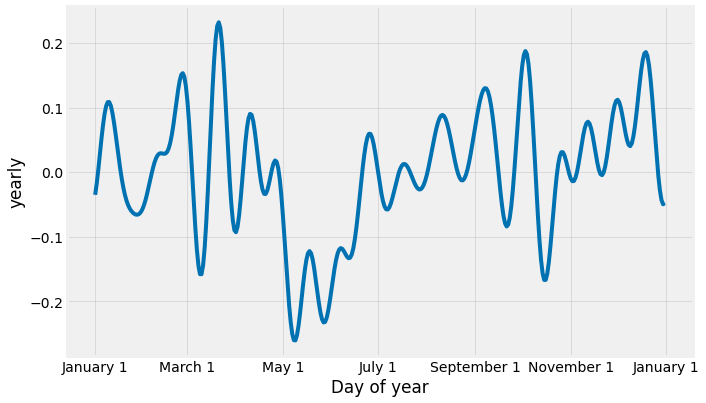

In [30]:
m = Prophet(yearly_seasonality=20).fit(df)
a = plot_yearly(m)

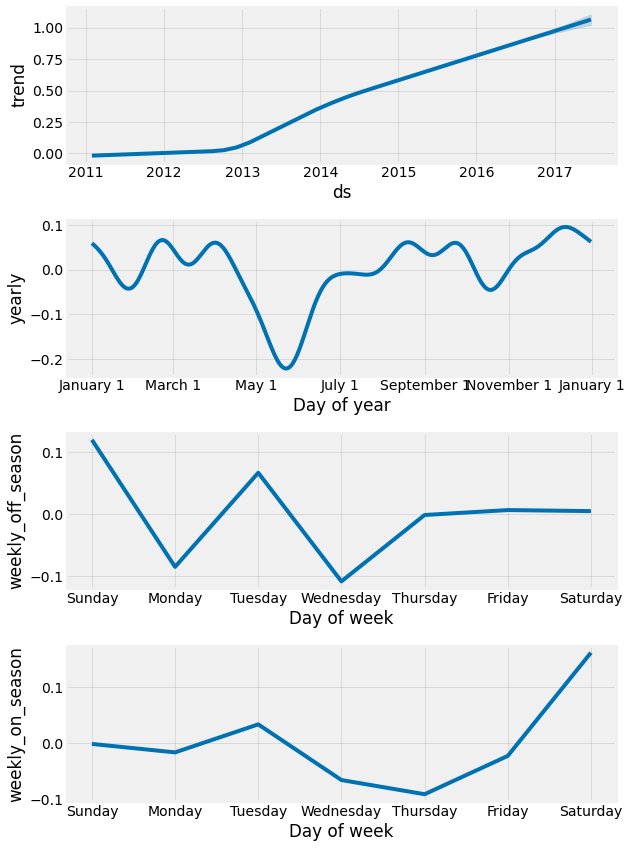

In [31]:
# Disable the built-in seasonality and replace it with two seasonalities then add the column to the future dataframe for which we are making the prediction
def is_NBA_season(ds):
    date = pd.to_datetime(ds)
    return(date.month> 6 or date.month<5)
df['on_season'] = df['ds'].apply(is_NBA_season)
df['off_season'] = ~df['ds'].apply(is_NBA_season)


m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='weekly_on_season', period=7, fourier_order=3, condition_name='on_season')
m.add_seasonality(name='weekly_off_season', period=7, fourier_order=3, condition_name='off_season')

future['on_season'] = future['ds'].apply(is_NBA_season)
future['off_season'] = ~future['ds'].apply(is_NBA_season)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

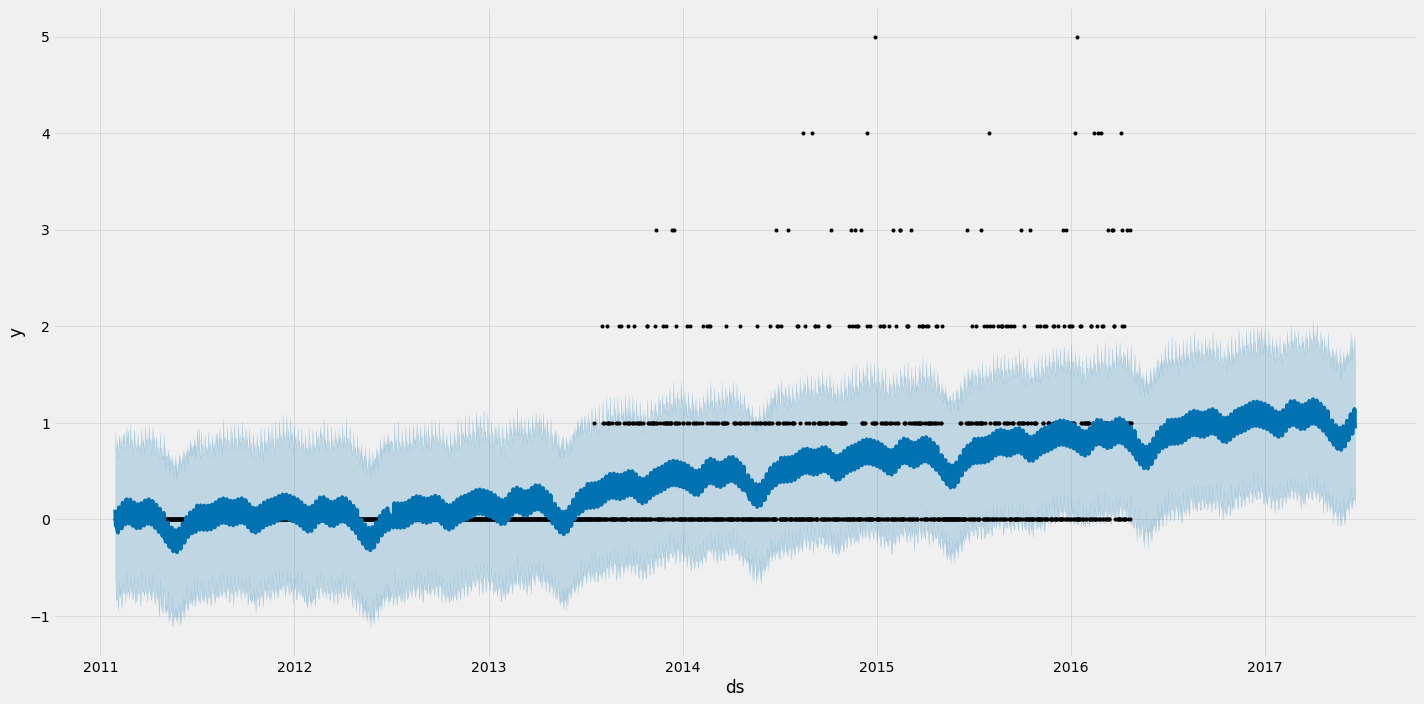

In [32]:
# Plot the forecast now 
f, ax = plt.subplots(1)
f.set_figheight(10)
f.set_figwidth(20)
fig2 = m.plot(forecast,ax=ax)
plt.show()


In [33]:
import pandas as pd
from fbprophet import Prophet
df = pd.read_csv(r'../input/m5-forecasting-accuracy/sell_prices.csv', parse_dates=[0])
df

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [34]:
store_id= index_reset()
# store_id = store.loc[:0]
# frame = {'store_id': store_id, 'item_id': item_id, 'sell_price':sell_price  }
# df = pd.DataFrame(frame)
# df.head()

# print('-'*60)
# print('*** Head of the dataframe ***')
# print('-'*60)
# print(df.head())
# print('-'*60)
# print('*** Tail of the dataframe ***')
# print('-'*60)
# print(df.tail())

NameError: name 'index_reset' is not defined

### Model with Additional Regressors 

In [35]:
# #  Model with additional regressors now 
# df = pd.read_csv(, parse_dates=[0])
# df


In [36]:
def run_prophet(id1,data):
    holidays = get_holidays(id1)
    model = Prophet(uncertainty_samples=False,
                    holidays=holidays,
                    weekly_seasonality = True,
                    yearly_seasonality= True,
                    changepoint_prior_scale = 0.5
                   )
    model.add_seasonality(name='monthly', period=30.5, fourier_order=2)
    model.add_regressor('sell_price')
    model.fit(df)

In [37]:
m= Prophet().fit(df)
future = m.make_future_dataframe(periods=365)
future.tail()

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [38]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2329,2017-06-15,1.001585,0.291268,1.801896
2330,2017-06-16,1.016604,0.211761,1.800197
2331,2017-06-17,1.021477,0.300351,1.798230
2332,2017-06-18,1.142421,0.371402,1.905099
2333,2017-06-19,0.942965,0.119721,1.653636


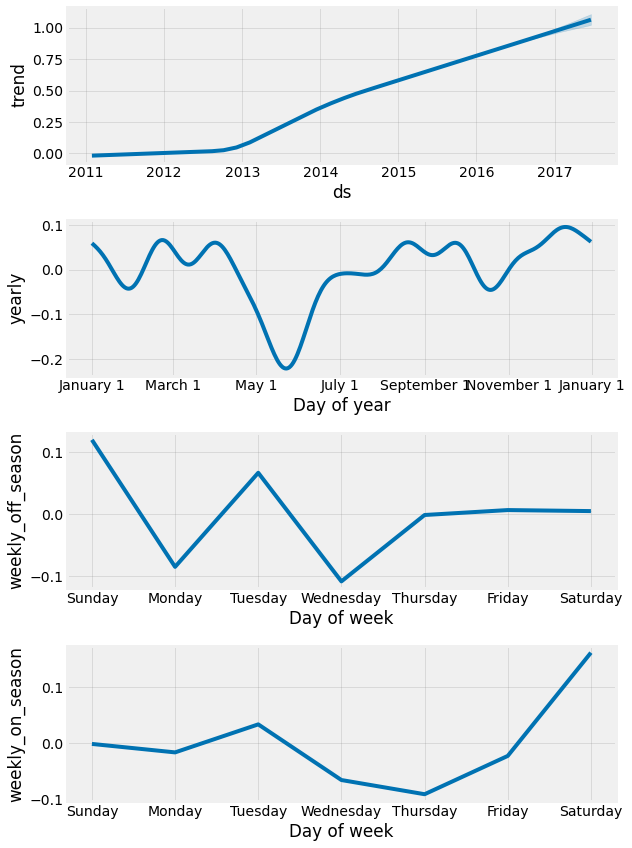

In [39]:
fig5 = m.plot_components(forecast)

In [40]:
# #function to calculate in sample SMAPE scores
# def smape_fast(y_true, y_pred): #adapted from link to discussion 
#     out = 0
#     for i in range(y_true.shape[0]):
#         if (y_true[i] != None and np.isnan(y_true[i]) ==  False):
#             a = y_true[i]
#             b = y_pred[i]
#             c = a+b
#             if c == 0:
#                 continue
#             out += math.fabs(a - b) / c
#     out *= (200.0 / y_true.shape[0])
#     return out

In [41]:
# model = Prophet(uncertainty_samples=False,yearly_seasonality=True,weekly_seasonality=True, holidays=holidays, changepoint_prior_scale = 0.5, holidays_prior_scale=0.05).fit(df)
# future = model.make_future_dataframe(periods=31+28, freq='D', include_history=True)

In [42]:
# fig3 = model.plot_components(forecast)
# plt.show()

In [43]:
# # Additional regressors (to do? Chanukah+ Ramadan